## TP sur l'approximation polynomiale d'un ensemble de points par la méthode des moindres carrés

### Programmez l'approximation polynomiale d'un ensemble de points par la méthodes des moindres carrés

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # j'ai initialise la seed pour reproduire des résultats aléatoires

def moindres_carres(x, y, ordre):
    Matrice_X = np.vander(x, ordre + 1, increasing=True)
    theta_optimal = np.linalg.inv(Matrice_X.T @ Matrice_X) @ Matrice_X.T @ y
    return theta_optimal

def evaluer_polynome(x, coefficients):
    Matrice_X = np.vander(x, len(coefficients), increasing=True)
    return Matrice_X @ coefficients


### Montrez des visualisations faisant apparaître les points et les représentations graphiques des polynômes des moindres carrés avec différentes valeurs de l'ordre

In [10]:
def fonction_polynomiale_1(x):
    return 3*x**2 + 2*x + 1

def fonction_polynomiale_2(x):
    return 0.5*x**4 - 3*x**3 + 2*x**2 + x + 5

x_points_1 = np.linspace(-10, 10, 50)
y_true_1 = fonction_polynomiale_1(x_points_1)
y_values_1 = y_true_1 + np.random.normal(0, 10, x_points_1.shape)

x_points_2 = np.linspace(-10, 10, 100)
y_true_2 = fonction_polynomiale_2(x_points_2)
y_values_2 = y_true_2 + np.random.normal(0, 50, x_points_2.shape)

y_pred_1 = evaluer_polynome(x_points_1, moindres_carres(x_points_1, y_values_1, 2))
y_pred_2 = evaluer_polynome(x_points_2, moindres_carres(x_points_2, y_values_2, 4))

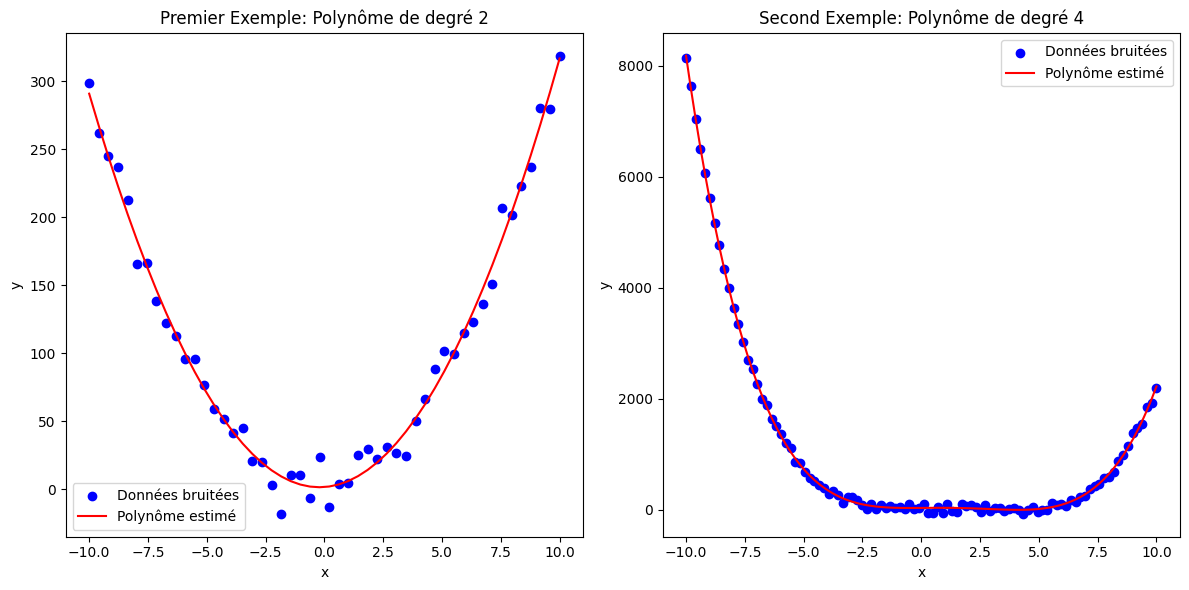

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_points_1, y_values_1, color='blue', label='Données bruitées')
plt.plot(x_points_1, y_pred_1, color='red', label='Polynôme estimé')
plt.title('Premier Exemple: Polynôme de degré 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_points_2, y_values_2, color='blue', label='Données bruitées')
plt.plot(x_points_2, y_pred_2, color='red', label='Polynôme estimé')
plt.title('Second Exemple: Polynôme de degré 4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

print("3x**2 + 2x + 1:")
print("Mean Absolute Error:", MAE(y_true_1, y_pred_1))
print("Mean Squared Error:", MSE(y_true_1, y_pred_1))
print("0.5*x**4 - 3*x**3 + 2*x**2 + x + 5:")
print("Mean Absolute Error:", MAE(y_true_2, y_pred_2))
print("Mean Squared Error:", MSE(y_true_2, y_pred_2))

3x**2 + 2x + 1:
Mean Absolute Error: 3.626899891415452
Mean Squared Error: 19.769906845876783
0.5*x**4 - 3*x**3 + 2*x**2 + x + 5:
Mean Absolute Error: 14.522134649173722
Mean Squared Error: 282.77557296917445


## Analyse des Résultats

### Polynôme de degré 2

Nous avons généré un ensemble de points autour du polynôme \(3x^2 + 2x + 1\). Après avoir appliqué notre méthode des moindres carrés, nous avons obtenu une approximation du polynôme initial. Les résultats en visuel montrent que le polynôme estimé passe bien à travers les points bruités, ce qui indique une bonne approximation.

- **Erreur Moyenne Absolue (MAE)** : Cette valeur nous montre, en moyenne, de combien les valeurs prédites s'éloignent des valeurs réelles. Plus cette valeur est basse, mieux c'est.
- **Erreur Quadratique Moyenne (MSE)** : donne plus de poids aux erreurs plus grandes. C'est aussi un bon indicateur de la qualité de l'approximation.

### Polynôme de degré 4

Ici nous avons augmenté la complexité en utilisant le polynôme \(0.5x^4 - 3x^3 + 2x^2 + x + 5\) et en ajoutant plus de bruit. Les résultats obtenus montrent également que l'approximation est réussie, malgré une variation plus grande due au bruit plus important.